# Index Tracking and Forward Testing

## Importing the Data

In [110]:
import pandas as pd

In [111]:
const = pd.read_csv("const_prices.csv", parse_dates = ["Date"], index_col = "Date")
const.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,2.992857,68.400002,60.360001,89.169998,61.160000,9.0175,27.730000,70.970001,33.738300,NaN,...,42.003819,29.860001,12.20875,64.540001,53.549999,52.570000,NaN,35.306732,46.070000,47.549999
2007-01-04,3.059286,71.330002,59.919998,89.529999,61.000000,9.4700,28.459999,70.279999,34.004654,NaN,...,43.043892,29.809999,12.33375,64.050003,53.099998,52.910000,NaN,35.502777,46.160000,47.779999
2007-01-05,3.037500,71.500000,59.130001,89.150002,60.220001,9.8800,28.469999,70.550003,33.728436,NaN,...,42.270992,29.639999,12.35375,63.500000,52.410000,52.549999,NaN,34.895969,45.500000,47.389999
2007-01-08,3.052500,70.930000,59.689999,88.940002,60.290001,9.9825,28.629999,71.449997,34.034248,NaN,...,42.261452,29.930000,12.31625,63.639999,52.020000,53.320000,NaN,34.363850,45.689999,47.000000
2007-01-09,3.306071,71.269997,59.310001,88.000000,60.619999,9.9900,28.469999,70.629997,33.984924,NaN,...,41.870228,29.959999,12.47000,63.480000,51.889999,52.680000,NaN,34.503880,45.930000,47.389999


In [112]:
dji = pd.read_csv("dji.csv", parse_dates = ["Date"], index_col = "Date")
dji.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000


In [113]:
dji = dji.Close.to_frame().copy()

In [114]:
df = pd.concat([const, dji], axis = 1)

In [115]:
df.rename(columns = {"Close": "DJI"}, inplace = True)
df.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,2.992857,68.400002,60.360001,89.169998,61.160000,9.0175,27.730000,70.970001,33.738300,NaN,...,29.860001,12.20875,64.540001,53.549999,52.570000,NaN,35.306732,46.070000,47.549999,12474.519531
2007-01-04,3.059286,71.330002,59.919998,89.529999,61.000000,9.4700,28.459999,70.279999,34.004654,NaN,...,29.809999,12.33375,64.050003,53.099998,52.910000,NaN,35.502777,46.160000,47.779999,12480.690430
2007-01-05,3.037500,71.500000,59.130001,89.150002,60.220001,9.8800,28.469999,70.550003,33.728436,NaN,...,29.639999,12.35375,63.500000,52.410000,52.549999,NaN,34.895969,45.500000,47.389999,12398.009766
2007-01-08,3.052500,70.930000,59.689999,88.940002,60.290001,9.9825,28.629999,71.449997,34.034248,NaN,...,29.930000,12.31625,63.639999,52.020000,53.320000,NaN,34.363850,45.689999,47.000000,12423.490234
2007-01-09,3.306071,71.269997,59.310001,88.000000,60.619999,9.9900,28.469999,70.629997,33.984924,NaN,...,29.959999,12.47000,63.480000,51.889999,52.680000,NaN,34.503880,45.930000,47.389999,12416.599609


In [116]:
more_info = pd.read_csv("const.csv")
more_info.head()

,Company,Exchange,Symbol,Industry,Date_Added
0,3M,NYSE,MMM,Conglomerate,1976-08-09
1,American Express,NYSE,AXP,Financial services,1982-08-30
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12


## Transforming the Data

In [117]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")

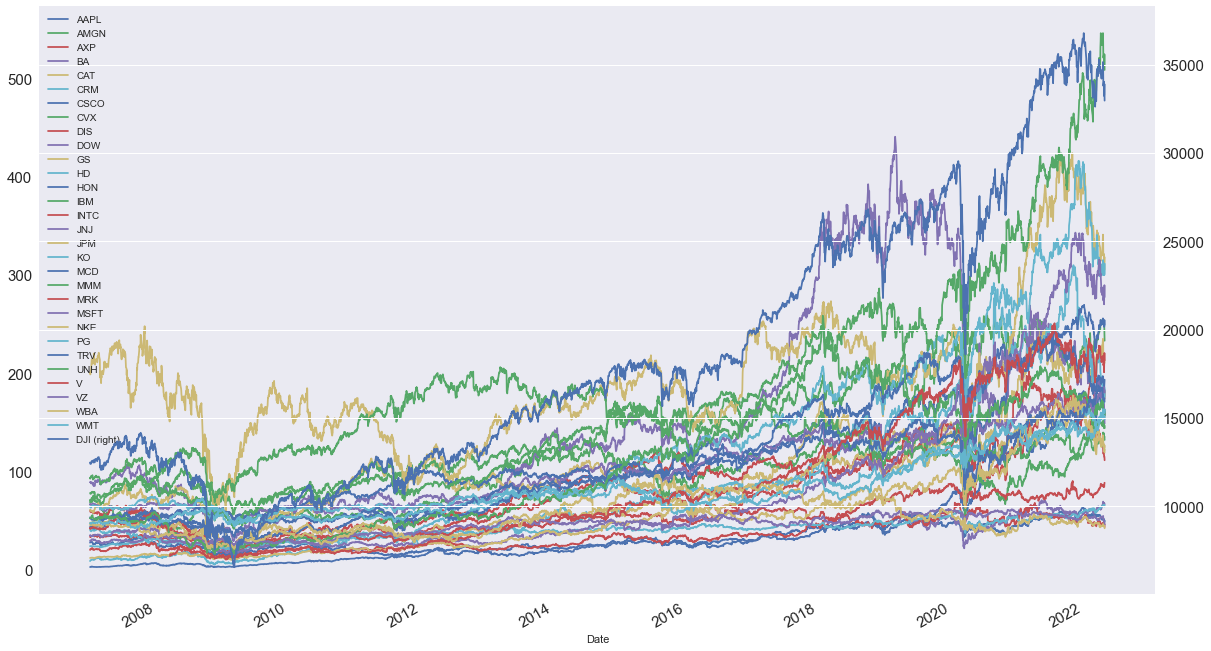

In [118]:
df.plot(figsize = (20, 12), fontsize = 15, secondary_y = "DJI")
plt.show()

To understand different stocks properly, we need to normalize them, i.e. with the same starting point.

In [119]:
norm = df.div(df.iloc[0]).mul(100)

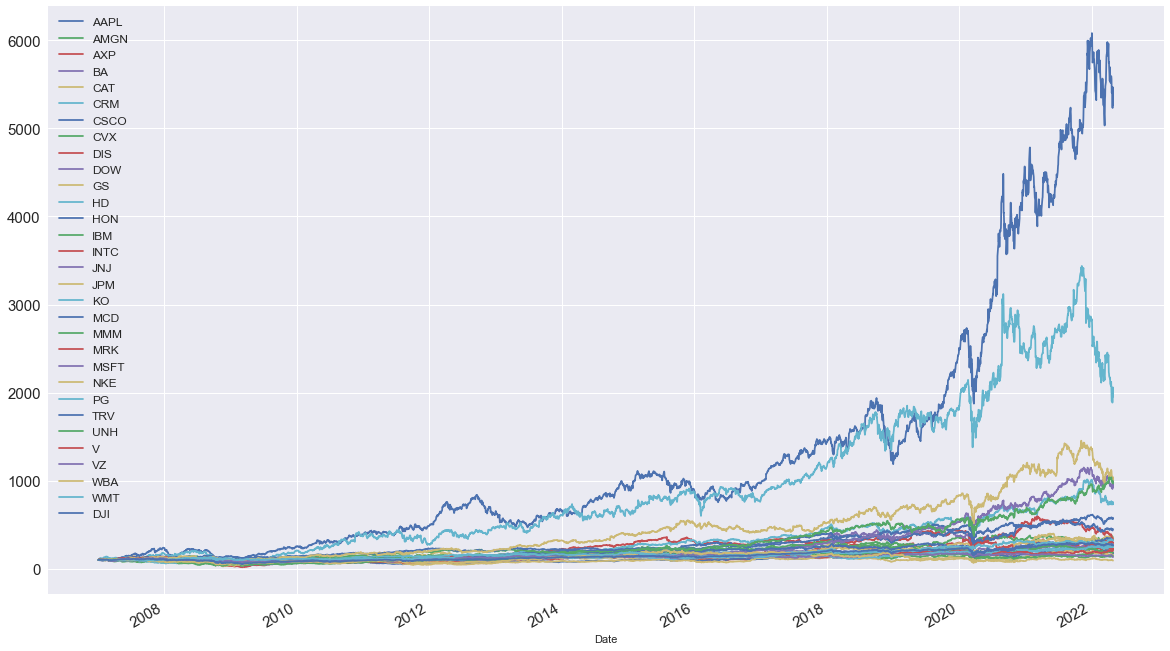

In [120]:
norm.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

In [121]:
ret = df.pct_change()
ret.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.022196,0.042836,-0.007290,0.004037,-0.002616,0.050180,0.026325,-0.009722,0.007895,NaN,...,-0.001675,0.010239,-0.007592,-0.008403,0.006468,NaN,0.005553,0.001954,0.004837,0.000495
2007-01-05,-0.007121,0.002383,-0.013184,-0.004244,-0.012787,0.043295,0.000351,0.003842,-0.008123,NaN,...,-0.005703,0.001622,-0.008587,-0.012994,-0.006804,NaN,-0.017092,-0.014298,-0.008162,-0.006625
2007-01-08,0.004938,-0.007972,0.009471,-0.002356,0.001162,0.010374,0.005620,0.012757,0.009067,NaN,...,0.009784,-0.003036,0.002205,-0.007441,0.014653,NaN,-0.015249,0.004176,-0.008230,0.002055
2007-01-09,0.083070,0.004793,-0.006366,-0.010569,0.005474,0.000751,-0.005589,-0.011477,-0.001449,NaN,...,0.001002,0.012484,-0.002514,-0.002499,-0.012003,NaN,0.004075,0.005253,0.008298,-0.000555


In [122]:
ret.describe() #Summary statistics

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
count,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,785.000000,...,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3554.000000,3858.000000,3858.000000,3858.000000,3858.000000
mean,0.001233,0.000459,0.000563,0.000393,0.000531,0.001098,0.000317,0.000382,0.000468,0.000742,...,0.000736,0.000767,0.000306,0.000466,0.000796,0.000945,0.000158,0.000146,0.000386,0.000328
std,0.020221,0.016860,0.024069,0.022810,0.020508,0.025725,0.018368,0.018760,0.017837,0.027187,...,0.017791,0.018203,0.011831,0.018165,0.020475,0.019041,0.013304,0.018294,0.012889,0.012284
min,-0.179195,-0.095846,-0.175949,-0.238484,-0.142822,-0.184533,-0.162107,-0.221248,-0.129846,-0.216577,...,-0.147390,-0.118347,-0.087373,-0.208004,-0.186362,-0.136435,-0.080685,-0.149873,-0.101832,-0.129265
25%,-0.008003,-0.007854,-0.008094,-0.009443,-0.009017,-0.010662,-0.007376,-0.007862,-0.007367,-0.012347,...,-0.007486,-0.007734,-0.004873,-0.006497,-0.007931,-0.007759,-0.006407,-0.008431,-0.005673,-0.004105
50%,0.000999,0.000263,0.000674,0.000372,0.000473,0.000699,0.000443,0.000673,0.000450,0.000553,...,0.000496,0.000652,0.000355,0.000755,0.000735,0.001135,0.000316,0.000000,0.000403,0.000590
75%,0.011574,0.008775,0.009715,0.010388,0.010420,0.012992,0.008622,0.008708,0.008302,0.014732,...,0.009229,0.009405,0.005804,0.007732,0.009308,0.009358,0.006795,0.009159,0.006381,0.005556
max,0.139049,0.139192,0.218823,0.243186,0.147229,0.260449,0.159505,0.227407,0.159722,0.209091,...,0.186047,0.155314,0.120090,0.255556,0.347550,0.149973,0.146324,0.166355,0.117085,0.113650


In [123]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"] * 252
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [124]:
summary = summary_ann(ret)

In [125]:
summary = summary.merge(more_info.loc[:, ["Symbol", "Company"]],
                        how = "left", left_index= True, right_on = "Symbol")

In [126]:
summary.set_index("Company", inplace = True)

In [127]:
summary.rename(index = {np.nan : "Dow Jones"}, inplace = True)

In [128]:
summary

,Return,Risk,Symbol
Company,,,
Apple,0.310705,0.321001,AAPL
Amgen,0.115742,0.267642,AMGN
American Express,0.141832,0.382083,AXP
Boeing,0.099014,0.362102,BA
Caterpillar,0.133758,0.325554,CAT
Salesforce,0.276774,0.408370,CRM
Cisco,0.079802,0.291583,CSCO
Chevron,0.096150,0.297799,CVX
Disney,0.118045,0.283147,DIS


## Explanatory Data Analysis

In [129]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3859 entries, 2007-01-03 to 2022-04-29
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3858 non-null   float64
 1   AMGN    3858 non-null   float64
 2   AXP     3858 non-null   float64
 3   BA      3858 non-null   float64
 4   CAT     3858 non-null   float64
 5   CRM     3858 non-null   float64
 6   CSCO    3858 non-null   float64
 7   CVX     3858 non-null   float64
 8   DIS     3858 non-null   float64
 9   DOW     785 non-null    float64
 10  GS      3858 non-null   float64
 11  HD      3858 non-null   float64
 12  HON     3858 non-null   float64
 13  IBM     3858 non-null   float64
 14  INTC    3858 non-null   float64
 15  JNJ     3858 non-null   float64
 16  JPM     3858 non-null   float64
 17  KO      3858 non-null   float64
 18  MCD     3858 non-null   float64
 19  MMM     3858 non-null   float64
 20  MRK     3858 non-null   float64
 21  MSFT    3858 non-nu

In [130]:
summary2 = summary.drop(index = "Dow")

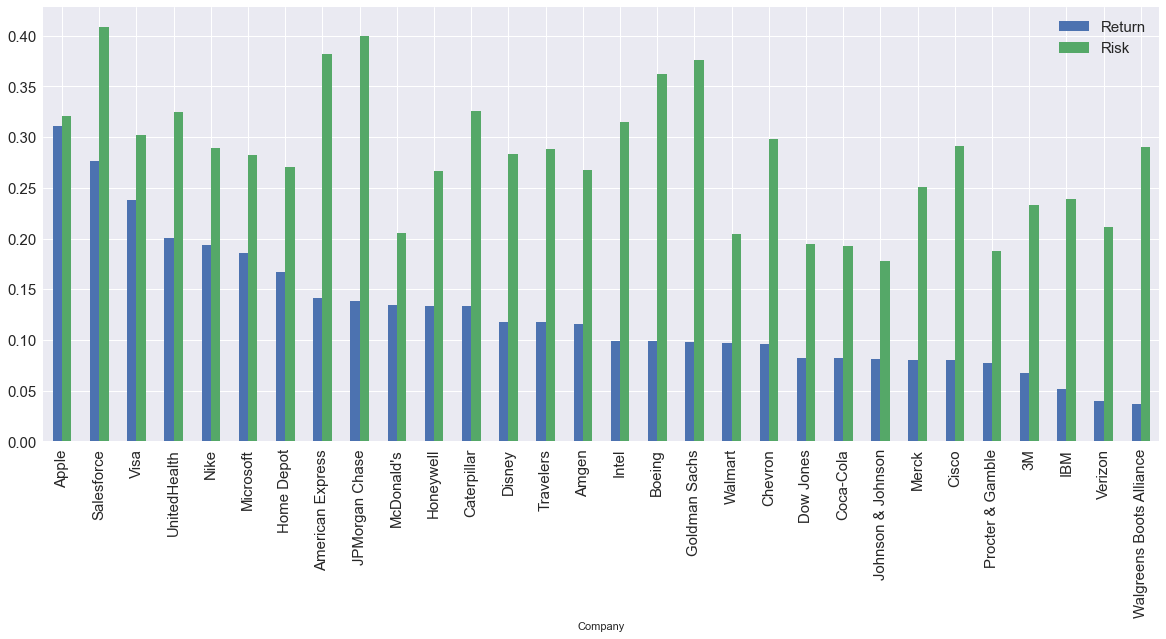

In [131]:
summary2.sort_values(by = "Return", ascending = False).plot(kind = "bar", figsize = (20, 8), 
                                                            fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

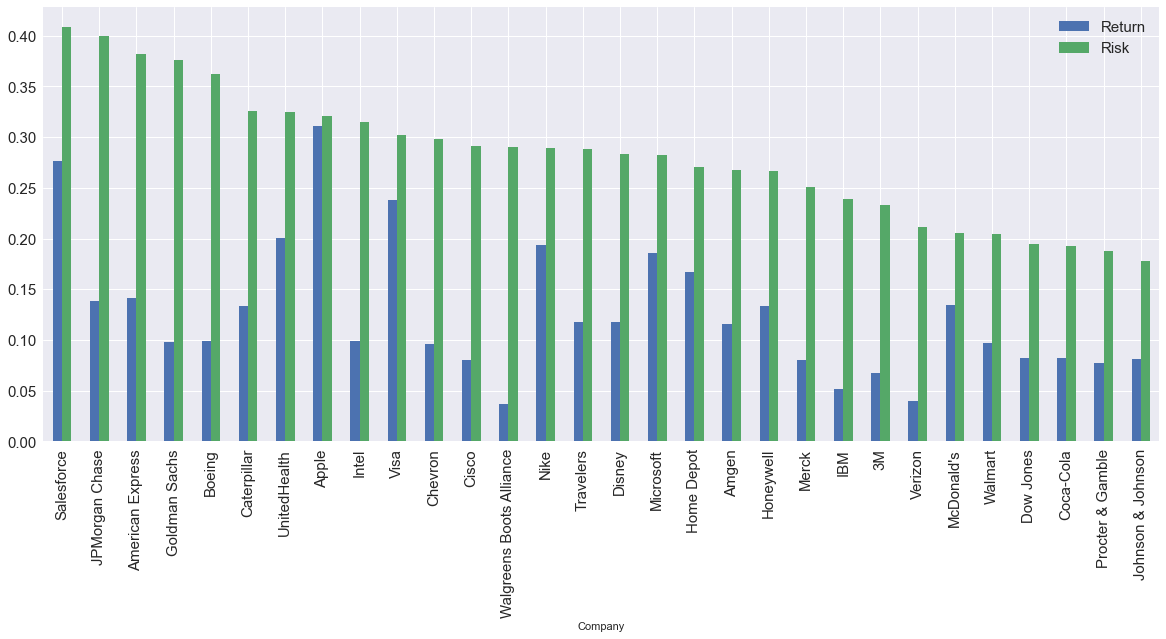

In [132]:
summary2.sort_values(by = "Risk", ascending = False).plot(kind = "bar", figsize = (20, 8), 
                                                          fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [133]:
summary2.set_index("Symbol", inplace = True)

In [134]:
summary2.head()

,Return,Risk
Symbol,,
AAPL,0.310705,0.321001
AMGN,0.115742,0.267642
AXP,0.141832,0.382083
BA,0.099014,0.362102
CAT,0.133758,0.325554


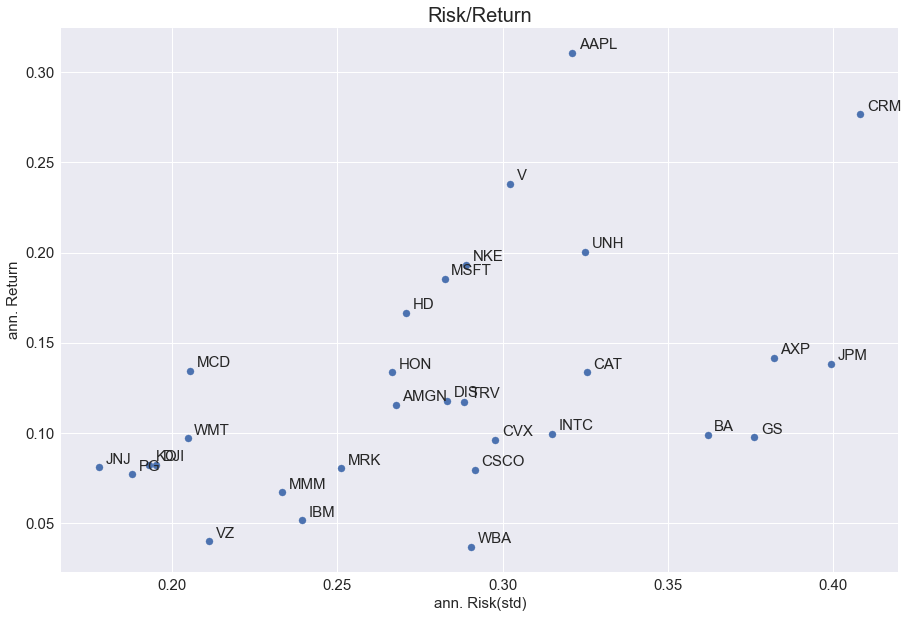

In [135]:
summary2.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (15,10), s = 50, fontsize = 15)
for i in summary2.index:
    plt.annotate(i, xy=(summary2.loc[i, "Risk"]+0.002, summary2.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

Being closer to the upper left corner is desirable, e.g. AAPL.

In [136]:
corr_matrix = ret.corr()

In [137]:
import seaborn as sns

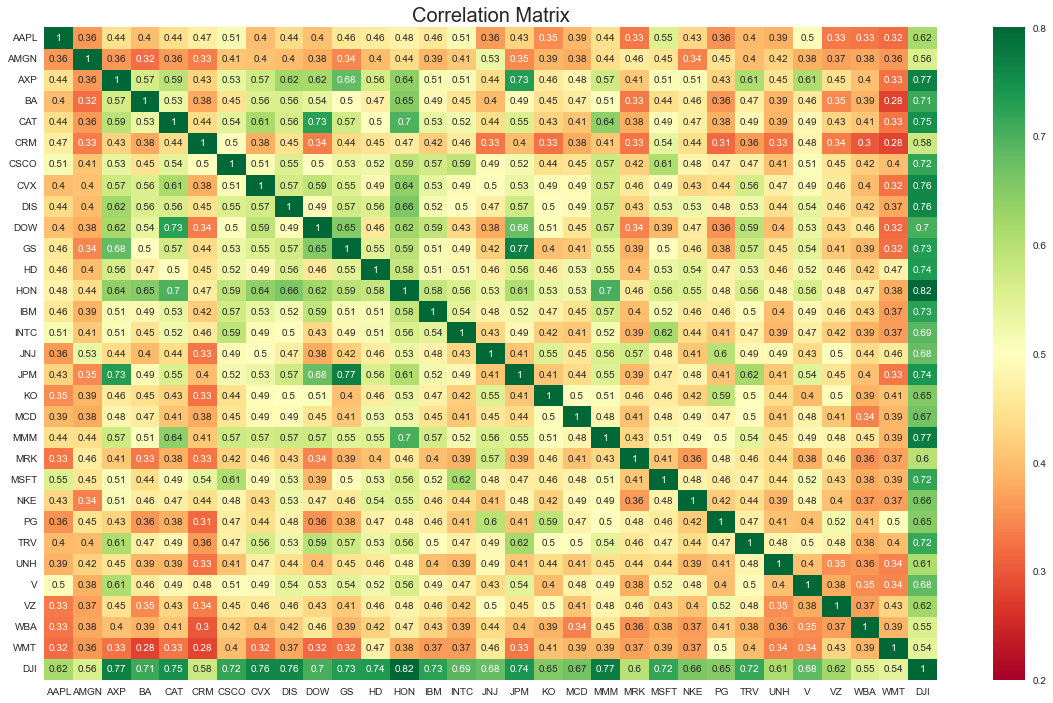

In [138]:
plt.figure(figsize = (20, 12))
sns.heatmap(corr_matrix, cmap='RdYlGn',annot=True, vmin = 0.2, vmax = 0.8)
plt.title("Correlation Matrix", fontsize=20)
plt.show()

## Index Tracking - an Introduction

Plan: Track the DJI with only __10 Stocks__ (Tracking Portfolio).

Criteria to select Tracking Portfolio: Those 10 Stocks with the __lowest individual Tracking Error__ (TE) in the Training/Fitting Period.

- Training/Fitting Period: 2017 & 2018
- (Forward) Testing Period: 2019

Once we have identified the 10 Tracking Stocks we need to find their __optimal weights__ in the Tracking Portfolio that __minimize TE__.

In [139]:
df2 = df.loc["2017":"2018"].copy()
df2.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,29.037500,150.729996,75.349998,156.970001,93.989998,70.540001,30.540001,117.849998,106.080002,NaN,...,62.580002,51.980000,84.199997,120.900002,161.449997,79.500000,54.580002,82.959999,68.660004,19881.759766
2017-01-04,29.004999,152.869995,76.260002,158.619995,93.570000,72.800003,30.100000,117.820000,107.440002,NaN,...,62.299999,53.070000,84.500000,120.250000,161.910004,80.150002,54.520000,82.980003,69.059998,19942.160156
2017-01-05,29.152500,152.979996,75.320000,158.710007,93.000000,72.790001,30.170000,117.309998,107.379997,NaN,...,62.299999,53.060001,85.059998,118.330002,162.179993,81.089996,54.639999,83.029999,69.209999,19899.289062
2017-01-06,29.477501,156.779999,75.470001,159.100006,93.040001,73.800003,30.230000,116.839996,108.980003,NaN,...,62.840000,53.910000,85.029999,118.269997,162.410004,82.209999,53.259998,83.099998,68.260002,19963.800781
2017-01-09,29.747499,158.839996,75.860001,158.320007,92.370003,73.959999,30.180000,115.839996,108.360001,NaN,...,62.639999,53.380001,84.400002,117.320000,161.949997,81.750000,52.680000,82.550003,68.709999,19887.380859


In [140]:
norm2 = df2.div(df2.iloc[0]).mul(100)
norm2.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,99.888072,101.419757,101.207702,101.051152,99.553146,103.203859,98.559265,99.974545,101.282052,NaN,...,99.552569,102.096961,100.356298,99.462364,100.284922,100.817612,99.890067,100.024113,100.582572,100.303798
2017-01-05,100.396039,101.492735,99.960187,101.108496,98.946699,103.189680,98.788471,99.541790,101.225486,NaN,...,99.552569,102.077726,101.021378,97.874277,100.452150,101.999995,100.109926,100.084378,100.801042,100.088168
2017-01-06,101.515284,104.013802,100.159260,101.356950,98.989257,104.621494,98.984933,99.142977,102.733787,NaN,...,100.415466,103.712967,100.985750,97.824644,100.594616,103.408804,97.581525,100.168755,99.417417,100.412645
2017-01-09,102.445111,105.380482,100.676844,100.860041,98.276418,104.848310,98.821216,98.294440,102.149320,NaN,...,100.095873,102.693347,100.237535,97.038874,100.309693,102.830189,96.518869,99.505791,100.072816,100.028273


In [141]:
ret2 = ret.loc["2017":"2018"].copy()
ret2.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.002849,0.030914,0.017144,0.008286,0.013479,0.030383,0.010589,0.001274,0.017847,NaN,...,0.007081,0.022624,0.001427,-0.012416,0.008810,0.018970,0.022480,0.002417,-0.006655,0.006030
2017-01-04,-0.001119,0.014198,0.012077,0.010512,-0.004469,0.032039,-0.014407,-0.000255,0.012821,NaN,...,-0.004474,0.020970,0.003563,-0.005376,0.002849,0.008176,-0.001099,0.000241,0.005826,0.003038
2017-01-05,0.005085,0.000720,-0.012326,0.000567,-0.006092,-0.000137,0.002326,-0.004329,-0.000558,NaN,...,0.000000,-0.000188,0.006627,-0.015967,0.001668,0.011728,0.002201,0.000602,0.002172,-0.002150
2017-01-06,0.011148,0.024840,0.001992,0.002457,0.000430,0.013876,0.001989,-0.004006,0.014900,NaN,...,0.008668,0.016020,-0.000353,-0.000507,0.001418,0.013812,-0.025256,0.000843,-0.013726,0.003242
2017-01-09,0.009159,0.013139,0.005168,-0.004903,-0.007201,0.002168,-0.001654,-0.008559,-0.005689,NaN,...,-0.003183,-0.009831,-0.007409,-0.008032,-0.002832,-0.005595,-0.010890,-0.006618,0.006592,-0.003828


In [142]:
ret_diff = ret2.sub(ret2.DJI, axis = 0)
ret_diff.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,-0.003180,0.024885,0.011114,0.002257,0.007449,0.024353,0.004559,-0.004755,0.011817,NaN,...,0.001051,0.016595,-0.004602,-0.018446,0.002781,0.012940,0.016451,-0.003613,-0.012685,0.0
2017-01-04,-0.004157,0.011160,0.009039,0.007474,-0.007507,0.029001,-0.017445,-0.003293,0.009783,NaN,...,-0.007512,0.017932,0.000525,-0.008414,-0.000189,0.005138,-0.004137,-0.002797,0.002788,0.0
2017-01-05,0.007235,0.002869,-0.010177,0.002717,-0.003942,0.002012,0.004475,-0.002179,0.001591,NaN,...,0.002150,0.001961,0.008777,-0.013817,0.003817,0.013878,0.004351,0.002752,0.004322,0.0
2017-01-06,0.007906,0.021598,-0.001250,-0.000785,-0.002812,0.010634,-0.001253,-0.007248,0.011659,NaN,...,0.005426,0.012778,-0.003595,-0.003749,-0.001824,0.010570,-0.028498,-0.002399,-0.016968,0.0
2017-01-09,0.012987,0.016967,0.008996,-0.001075,-0.003373,0.005996,0.002174,-0.004731,-0.001861,NaN,...,0.000645,-0.006003,-0.003581,-0.004205,0.000996,-0.001767,-0.007062,-0.002791,0.010420,0.0


In [143]:
ret_diff.agg(["mean", "std"]).T

,mean,std
AAPL,0.000362,0.011576
AMGN,0.000290,0.010603
AXP,0.000210,0.008355
BA,0.001214,0.011468
CAT,0.000409,0.012363
CRM,0.001156,0.013168
CSCO,0.000446,0.009521
CVX,-0.000445,0.009945
DIS,-0.000198,0.009633
DOW,NaN,NaN


The standard deviation is the Tracking Error.

## Selecting the Tracking Stocks

Now we will annualize the mean and std.

In [144]:
def tracking_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Premium"] = summary["mean"] * 252
    summary["TE"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [145]:
tracking = tracking_ann(ret_diff)

In [146]:
tracking.sort_values(by = "TE")

,Premium,TE
DJI,0.000000,0.000000
HON,0.006790,0.097753
MMM,-0.041338,0.124822
JPM,-0.011811,0.131067
V,0.191612,0.131870
AXP,0.053010,0.132638
KO,-0.017858,0.134622
HD,0.049276,0.134628
TRV,-0.088862,0.137179
UNH,0.148181,0.138631


In [147]:
noa = 10

In [148]:
tracking_stocks = tracking.sort_values(by = "TE").index[:noa+1]

In [149]:
tracking_stocks

Index(['DJI', 'HON', 'MMM', 'JPM', 'V', 'AXP', 'KO', 'HD', 'TRV', 'UNH',
       'JNJ'],
      dtype='object')

In [150]:
norm_track = norm2.loc[:, tracking_stocks]
norm_track

,DJI,HON,MMM,JPM,V,AXP,KO,HD,TRV,UNH,JNJ
Date,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.275440,100.151645,99.633154,100.817612,101.207702,99.641154,100.886012,99.462364,100.284922,99.835985
2017-01-05,100.088168,100.499225,99.809044,98.716035,101.999995,99.960187,99.880385,99.694733,97.874277,100.452150,100.880529
2017-01-06,100.412645,102.022725,100.101091,98.727501,103.408804,100.159260,99.856465,99.419255,97.824644,100.594616,100.397105
2017-01-09,100.028273,101.179209,99.561922,98.796282,102.830189,100.676844,98.851676,100.000000,97.038874,100.309693,100.379836
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,109.609006,112.103318,100.320130,105.628793,153.119501,118.779034,109.952153,117.742538,93.159633,144.279967,106.042818
2018-12-26,115.072556,116.360070,104.611059,110.008019,163.811315,124.538817,112.296649,125.292236,96.914803,150.727786,109.383635
2018-12-27,116.382154,118.156165,107.104742,111.246128,166.050308,125.653619,113.708133,126.811116,98.155498,152.350577,109.987921


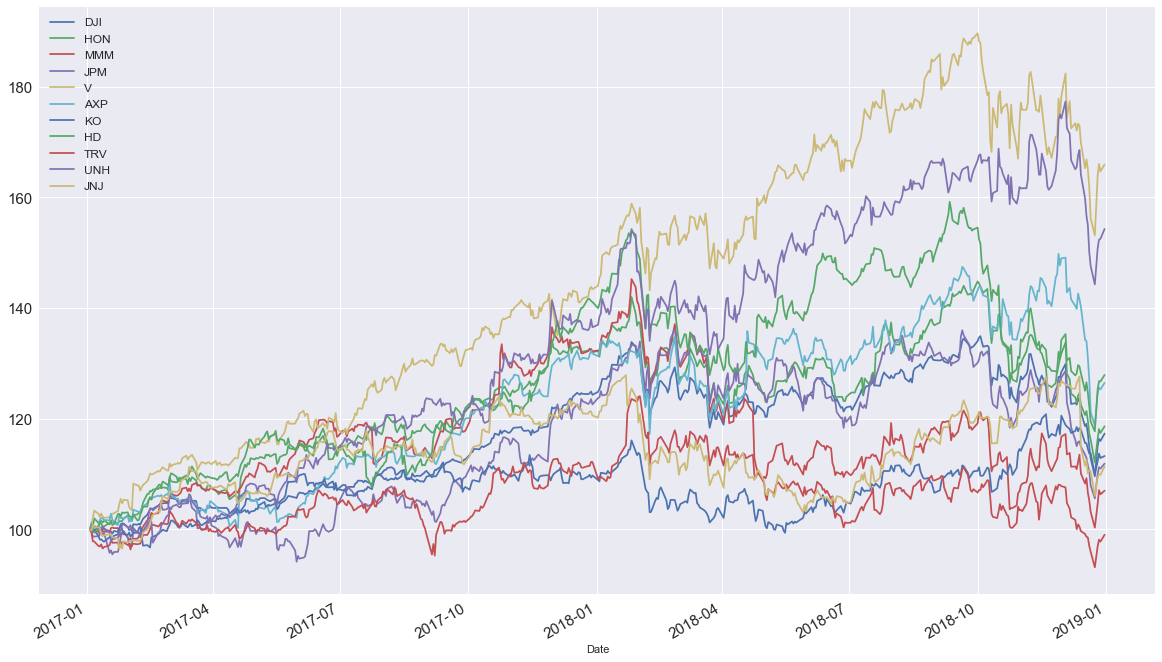

In [151]:
norm_track.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

Now we will remove the DJI.

In [152]:
tracking_stocks = tracking_stocks[1:]
tracking_stocks

Index(['HON', 'MMM', 'JPM', 'V', 'AXP', 'KO', 'HD', 'TRV', 'UNH', 'JNJ'], dtype='object')

## Index Tracking - A simple Tracking Portfolio

In [153]:
#equal weights (starting point of optimization)
eweights = np.full(noa, 1/noa)
eweights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [154]:
#calculate portfolio returns (based on weights)
def port_ret(weights):
    return ret2.loc[:, tracking_stocks].dot(weights)

In [155]:
#define function to be minimized -> minimize tracking error of tracking portfolio
def tracking_error(weights): 
     return port_ret(weights).sub(ret2.DJI).std() * np.sqrt(252)

In [156]:
tracking_error(eweights)

0.04102091115599324

In [157]:
ew_port = port_ret(eweights)[1:].add(1).cumprod().mul(100)
ew_port

Date
2017-01-04    100.219599
2017-01-05     99.976704
2017-01-06    100.247854
2017-01-09     99.960713
2017-01-10    100.047014
                 ...    
2018-12-24    116.625102
2018-12-26    121.785381
2018-12-27    123.331230
2018-12-28    122.871191
2018-12-31    124.013117
Length: 501, dtype: float64

In [158]:
norm_track["EW_Port"] = ew_port
norm_track.iloc[0, -1] = 100

In [159]:
norm_track

,DJI,HON,MMM,JPM,V,AXP,KO,HD,TRV,UNH,JNJ,EW_Port
Date,,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.275440,100.151645,99.633154,100.817612,101.207702,99.641154,100.886012,99.462364,100.284922,99.835985,100.219599
2017-01-05,100.088168,100.499225,99.809044,98.716035,101.999995,99.960187,99.880385,99.694733,97.874277,100.452150,100.880529,99.976704
2017-01-06,100.412645,102.022725,100.101091,98.727501,103.408804,100.159260,99.856465,99.419255,97.824644,100.594616,100.397105,100.247854
2017-01-09,100.028273,101.179209,99.561922,98.796282,102.830189,100.676844,98.851676,100.000000,97.038874,100.309693,100.379836,99.960713
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,109.609006,112.103318,100.320130,105.628793,153.119501,118.779034,109.952153,117.742538,93.159633,144.279967,106.042818,116.625102
2018-12-26,115.072556,116.360070,104.611059,110.008019,163.811315,124.538817,112.296649,125.292236,96.914803,150.727786,109.383635,121.785381
2018-12-27,116.382154,118.156165,107.104742,111.246128,166.050308,125.653619,113.708133,126.811116,98.155498,152.350577,109.987921,123.331230


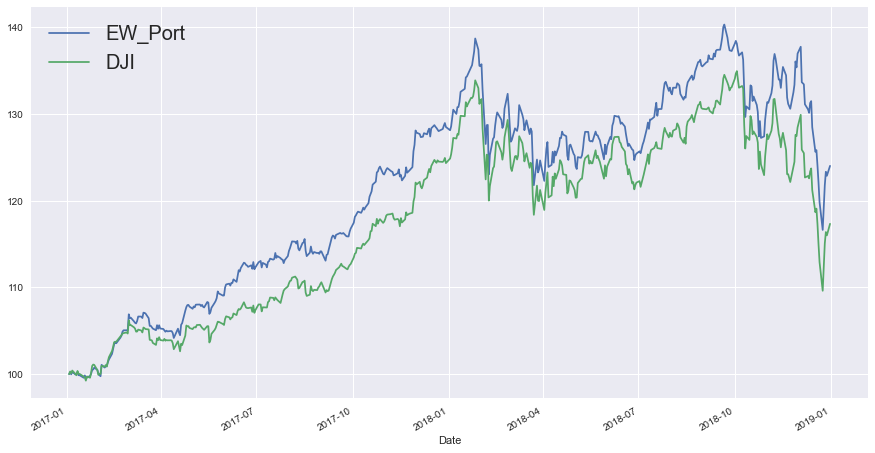

In [160]:
norm_track[["EW_Port", "DJI"]].plot(figsize = (15, 8))
plt.legend(fontsize = 20, loc = 2)
plt.show()

Now, in order to minimize the tracking error, we will optimize weights for each stocks.

## Index Tracking - The optimal Tracking Portfolio

In [161]:
import scipy.optimize as sco #import scipy optimize

In [162]:
#constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})
cons

{'type': 'eq', 'fun': <function __main__.<lambda>(x)>}

In [163]:
#bounds: all weights shall be between 0 and 1 -> can be changed
bnds =  tuple((0,1) for x in range(noa))
bnds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [164]:
#run optimization based on function to be minimized, starting with equal weights and based on respective bounds and constraints
opts = sco.minimize(tracking_error, eweights, bounds = bnds, constraints= cons)

In [165]:
#output of optimization
opts

     fun: 0.03816368407948853
     jac: array([0.01178902, 0.01115682, 0.01165584, 0.01118063, 0.01123751,
       0.01130496, 0.01139102, 0.01167275, 0.01126328, 0.01154238])
 message: 'Optimization terminated successfully'
    nfev: 77
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.09783899, 0.11926049, 0.1509521 , 0.15973454, 0.04087604,
       0.08224352, 0.10876454, 0.0598622 , 0.11537703, 0.06509057])

In [166]:
#getting the optimal weights
optimal_weights = opts["x"]
optimal_weights

array([0.09783899, 0.11926049, 0.1509521 , 0.15973454, 0.04087604,
       0.08224352, 0.10876454, 0.0598622 , 0.11537703, 0.06509057])

In [167]:
pd.Series(index = tracking_stocks, data = optimal_weights)

HON    0.097839
MMM    0.119260
JPM    0.150952
V      0.159735
AXP    0.040876
KO     0.082244
HD     0.108765
TRV    0.059862
UNH    0.115377
JNJ    0.065091
dtype: float64

In [168]:
opt_port = port_ret(optimal_weights)[1:].add(1).cumprod().mul(100)
opt_port

Date
2017-01-04    100.226492
2017-01-05    100.088294
2017-01-06    100.452458
2017-01-09    100.147109
2017-01-10    100.175088
                 ...    
2018-12-24    119.462449
2018-12-26    125.024355
2018-12-27    126.689877
2018-12-28    126.187628
2018-12-31    127.311142
Length: 501, dtype: float64

In [169]:
norm_track["Opt_Port"] = opt_port
norm_track.iloc[0, -1] = 100

In [170]:
norm_track

,DJI,HON,MMM,JPM,V,AXP,KO,HD,TRV,UNH,JNJ,EW_Port,Opt_Port
Date,,,,,,,,,,,,,
2017-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-01-04,100.303798,100.275440,100.151645,99.633154,100.817612,101.207702,99.641154,100.886012,99.462364,100.284922,99.835985,100.219599,100.226492
2017-01-05,100.088168,100.499225,99.809044,98.716035,101.999995,99.960187,99.880385,99.694733,97.874277,100.452150,100.880529,99.976704,100.088294
2017-01-06,100.412645,102.022725,100.101091,98.727501,103.408804,100.159260,99.856465,99.419255,97.824644,100.594616,100.397105,100.247854,100.452458
2017-01-09,100.028273,101.179209,99.561922,98.796282,102.830189,100.676844,98.851676,100.000000,97.038874,100.309693,100.379836,99.960713,100.147109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,109.609006,112.103318,100.320130,105.628793,153.119501,118.779034,109.952153,117.742538,93.159633,144.279967,106.042818,116.625102,119.462449
2018-12-26,115.072556,116.360070,104.611059,110.008019,163.811315,124.538817,112.296649,125.292236,96.914803,150.727786,109.383635,121.785381,125.024355
2018-12-27,116.382154,118.156165,107.104742,111.246128,166.050308,125.653619,113.708133,126.811116,98.155498,152.350577,109.987921,123.331230,126.689877


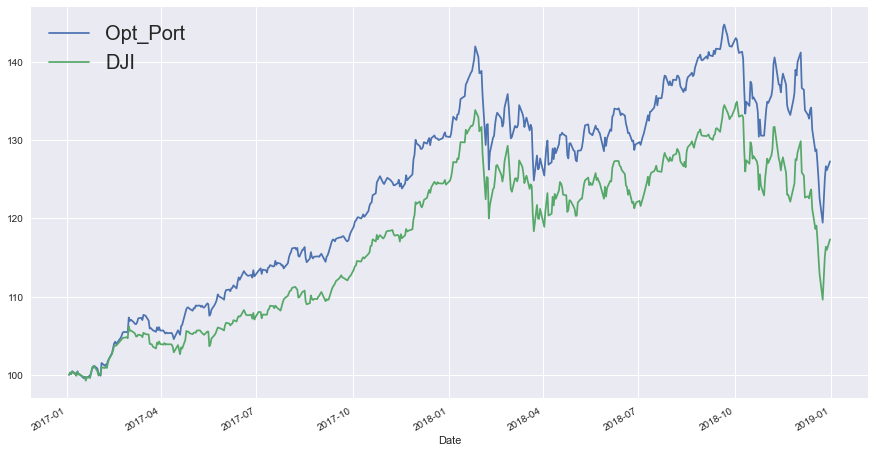

In [171]:
norm_track[["Opt_Port", "DJI"]].plot(figsize = (15, 8))
plt.legend(fontsize = 20, loc = 2)
plt.show()

In [172]:
summary_ann(norm_track[["Opt_Port", "EW_Port", "DJI"]].pct_change())

,Return,Risk
Opt_Port,0.130350,0.133004
EW_Port,0.116595,0.128801
DJI,0.089562,0.135206


## Forward Testing (Part 1)

In [173]:
df.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,2.992857,68.400002,60.360001,89.169998,61.160000,9.0175,27.730000,70.970001,33.738300,NaN,...,29.860001,12.20875,64.540001,53.549999,52.570000,NaN,35.306732,46.070000,47.549999,12474.519531
2007-01-04,3.059286,71.330002,59.919998,89.529999,61.000000,9.4700,28.459999,70.279999,34.004654,NaN,...,29.809999,12.33375,64.050003,53.099998,52.910000,NaN,35.502777,46.160000,47.779999,12480.690430
2007-01-05,3.037500,71.500000,59.130001,89.150002,60.220001,9.8800,28.469999,70.550003,33.728436,NaN,...,29.639999,12.35375,63.500000,52.410000,52.549999,NaN,34.895969,45.500000,47.389999,12398.009766
2007-01-08,3.052500,70.930000,59.689999,88.940002,60.290001,9.9825,28.629999,71.449997,34.034248,NaN,...,29.930000,12.31625,63.639999,52.020000,53.320000,NaN,34.363850,45.689999,47.000000,12423.490234
2007-01-09,3.306071,71.269997,59.310001,88.000000,60.619999,9.9900,28.469999,70.629997,33.984924,NaN,...,29.959999,12.47000,63.480000,51.889999,52.680000,NaN,34.503880,45.930000,47.389999,12416.599609


In [174]:
ret.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.022196,0.042836,-0.007290,0.004037,-0.002616,0.050180,0.026325,-0.009722,0.007895,NaN,...,-0.001675,0.010239,-0.007592,-0.008403,0.006468,NaN,0.005553,0.001954,0.004837,0.000495
2007-01-05,-0.007121,0.002383,-0.013184,-0.004244,-0.012787,0.043295,0.000351,0.003842,-0.008123,NaN,...,-0.005703,0.001622,-0.008587,-0.012994,-0.006804,NaN,-0.017092,-0.014298,-0.008162,-0.006625
2007-01-08,0.004938,-0.007972,0.009471,-0.002356,0.001162,0.010374,0.005620,0.012757,0.009067,NaN,...,0.009784,-0.003036,0.002205,-0.007441,0.014653,NaN,-0.015249,0.004176,-0.008230,0.002055
2007-01-09,0.083070,0.004793,-0.006366,-0.010569,0.005474,0.000751,-0.005589,-0.011477,-0.001449,NaN,...,0.001002,0.012484,-0.002514,-0.002499,-0.012003,NaN,0.004075,0.005253,0.008298,-0.000555


In [175]:
tracking_stocks

Index(['HON', 'MMM', 'JPM', 'V', 'AXP', 'KO', 'HD', 'TRV', 'UNH', 'JNJ'], dtype='object')

In [176]:
def tracking_error_gen(data, tracking_stocks, weights, index, start, end):
    return data.loc[start:end, tracking_stocks].dot(weights).sub(ret.loc[start:end, index]).std() * np.sqrt(252)   

In [177]:
def visual(data, tracking_stocks, weights, index, start, end):
    track = data.loc[start:end, tracking_stocks].dot(weights).add(1).cumprod().mul(100)
    track.name = "Portfolio"
    index = data.loc[start:end, index].add(1).cumprod().mul(100)
    plt.figure(figsize = (12,8))
    track.plot()
    index.plot()
    plt.legend(fontsize = 20, loc = 2)
    plt.show()

In [178]:
tracking_error_gen(ret, tracking_stocks, optimal_weights, "DJI", "2017-01-01", "2018-12-31")

0.03816368407948853

In [179]:
forward_te = tracking_error_gen(ret, tracking_stocks, optimal_weights, "DJI", 
                                "2019-01-01", "2019-12-31")
forward_te

0.04611649145620605

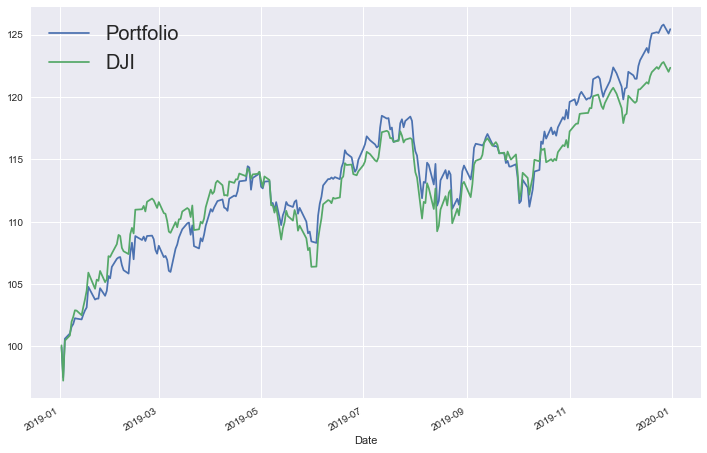

In [180]:
visual(ret, tracking_stocks, optimal_weights, "DJI", "2019-01-01", "2019-12-31")

Now, in the next section, we will see if the tracking portfolio performs better than a randomly selected portfolio. This will confirm our optimal tracking portfolio reliability.

## Forward Testing (Part 2)

In [181]:
#dropping DOW because we don't have enough data, and dropping DJI as it is an index.
bucket = df.columns.drop(["DOW", "DJI"])

In [184]:
random_stocks = np.random.choice(bucket, size = noa, replace = False)
random_numbers = np.random.random(noa)
random_weights = random_numbers / random_numbers.sum()

In [185]:
print(random_stocks, random_weights)

['BA' 'KO' 'JPM' 'AAPL' 'CRM' 'UNH' 'HD' 'AXP' 'V' 'VZ'] [0.03580418 0.15050604 0.18736459 0.12367464 0.05591184 0.08276387
 0.0356941  0.16070033 0.15041003 0.01717038]


In [186]:
tracking_error_gen(ret, random_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31")

0.047664439547241796

In [187]:
forward_te

0.04611649145620605

Clearly, our original tracking portfolio is lesser tracking error.

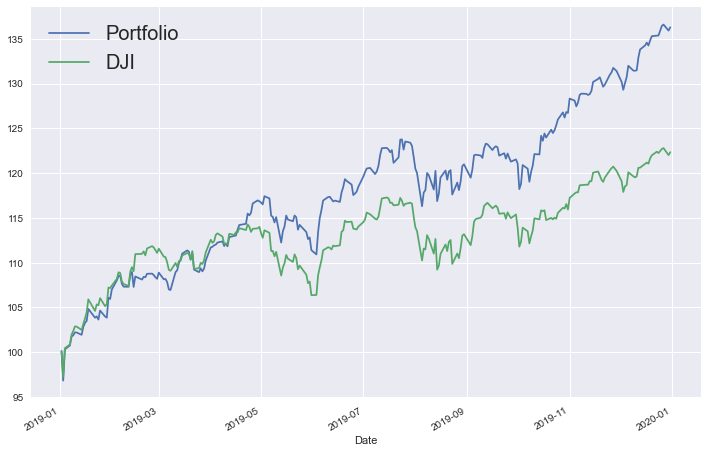

In [188]:
visual(ret, random_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31")

In [189]:
tes = np.empty(10000)
for i in range(10000):
    random_numbers = np.random.random(noa)
    random_weights = random_numbers / random_numbers.sum()
    random_stocks = np.random.choice(bucket, size = noa, replace = False)
       
    tes[i] = tracking_error_gen(ret, random_stocks, random_weights, "DJI", "2019-01-01", "2019-12-31")

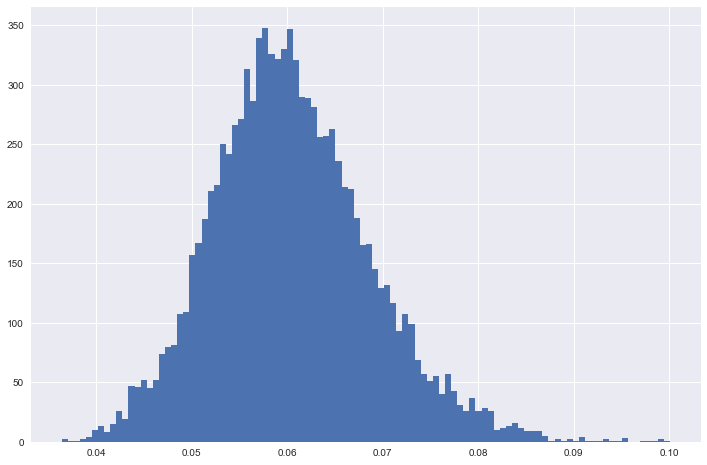

In [190]:
plt.figure(figsize = (12, 8))
plt.hist(tes, bins = 100)
plt.show()

In [194]:
(tes < forward_te).mean() * 100

3.04

**As clearly seen from the graph and verified from the result above, only 3.04% of randomly selected tracking portfolios performed better than our original tracking portfolio.**